# Скрипт для расчета параметров разрабатывваемого планера

Данный скрипт предназначен для расчета основных параметров модельных планеров для дальнейшего их проектирования в любой CAD среде. 

Примечание: данный скрипт написан в соответствии с пошаговой инструкцией "Step-by-step guide to calculating a light aircraft.pdf"

### ШАГ 0 - Подключение стандартных библиотек для работы

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### ШАГ 1 - Техническое задание

Параметры на этом шаге задаются вами в соответствии с вашеми целями

In [2]:
# ускорение свободного падения
g = 9.81 # м/с2

#вес мотора
w_motor = 53 #грамм

#количество моторов
n_motor = 1 #шт

# вес регулятора скорости
w_ESC = 27 #грамм

# Количество регуляторов скорости
n_ESC = 1 #шт

# Примечание: Количество моторов может отличаться от количества регуляторов скорости:
# n_motor >= n_ESC
# Связано это с тем, что к некоторым моделям ESC можно подключить более одного двигателя

# вес приемника управления
w_receiver = 15 #грамм, модель "FS-iA6B"
# Примечание: на борту планера могут быть и другие приёмники/передатчики. Основной приемник всегда один.

#вес сервопривода
w_servo = 13.4 #грамм, модель "TowerPro MG90"

#количество сервоприводов
n_servo = 6 #шт: на 2 Элерона, 1 Киль и 1 стабилизатор, 2 закрылка

#вес одной аккумуляторной ячейки
w_bat_cell = 49 #грамм, аккумуляторы типоразмера 18650

#количество ячеек в сборке
n_bat_cell = 6 #шт: схема сборки 3S2P

#вес платы BMS
w_BMS = 8.7 #грамм, модель "https://market.yandex.ru/product--bms-kontroller-3s-40a-dlia-li-ion-iacheek-3-7v-18650-26650/962042505?cpc=2T9kpZW_tO7nKULPmvl-cva4O6LDJVEop73t09BR7d3y2ij9fpFed_mt24qkdfwQJ7Pf54fCx7iH058HGpijKiwhtUS_xHXpyrsLpwIxzeCVOFnJ8aZybHKGxXlB3MZ5vFFjLrIPIIUv9uOFnuHc82L9xa8Sz6aJhyRD8PvePM2yJCqBYsF0pUAJXoRPGebJCdcoqBKZ5Y1Pk8BY0jZ_cD9ljHs6ZXBMkdryP_U8z2kQvmxP5Sf6SoNRSHBEGSYnNzJr1iWyUS-KdgHCFAMtlQ%2C%2C&from-show-uid=16834608512406912852400001&sku=101324535512&do-waremd5=veTjfe9vPLUWdF41vjtbng&sponsored=1&cpa=1"

#вес аккумуляторной сборки/покупного аккумулятора
w_bat = (w_bat_cell*n_bat_cell + w_BMS)*1.1 # масса самостоятельно собираемой батареи, грамм
# w_bat = 145 # масса покупного аккумулятора, грамм

#вес полезной нагрузки
w_load = 250 #грамм, под полезной нагрузкой можно понимать любое доп. оборудование

# Расчет массы внутренностей планера
W_insides = (w_motor*n_motor + w_ESC*n_ESC + w_servo*n_servo + w_bat + w_receiver + w_load) # грамм

# Расчет взлетной массы планера в первом приближении
W_plane = W_insides*2 # грамм

# Расчет взлетного веса планера в первом приближении
G_plane = W_plane/1000 * g # Н

# Удельное давление на крыло
p_wing = np.array([30, 40, 50, 60])/10*g # г/дм2 --> Н/м2

# Профиль крыла: Р III (15.5%)

# Профиль оперения: (не определено)

# удлинение крыла 
lmd_wing = np.array([16, 15, 14, 13])

In [3]:
out = np.array([W_insides,W_plane])
pd.DataFrame(out)

,0
0,758.37
1,1516.74


In [4]:
pd.DataFrame(p_wing)


,0
0,29.43
1,39.24
2,49.05
3,58.86


## Компоновочный расчет модели

### 1. Определение полной несущей площади модели

In [5]:
# Определение полной несущей площади модели
S_mod = G_plane/p_wing # м2

# Определение площади стабилизатора
S_stab = S_mod/9 # м2

# Определение площади крыла
S_wing = S_mod - S_stab # м2

# вывод результатов блока
Data_S = np.array([S_mod,S_stab,S_wing])*100 # м2 --> дм2
pd.DataFrame(Data_S,
             index=['Общая, дм2', 'Стабилизатор, дм2', 'Крыло, дм2'], 
             columns=['p30','p40','p50','p60',]).round(0) # дм2

,p30,p40,p50,p60
"Общая, дм2",51.0,38.0,30.0,25.0
"Стабилизатор, дм2",6.0,4.0,3.0,3.0
"Крыло, дм2",45.0,34.0,27.0,22.0


In [6]:
# Определение размаха крыла и САХ
l_wing = np.zeros(4)
b_wing = np.zeros(4)
for i in range (4):
    l_wing[i] = math.sqrt(lmd_wing[i]*S_wing[i]) # м
    b_wing[i] = S_wing[i]/l_wing[i] # м
#l_wing = math.sqrt(lmd_wing*S_wing) # м
out1 = np.array([l_wing*1000,b_wing*1000]) # мм
pd.DataFrame(out1,
             index=['Длина Крыла, мм','САХ Крыла, мм'], 
             columns=['p30','p40','p50','p60',]).round(0)

,p30,p40,p50,p60
"Длина Крыла, мм",2682.0,2249.0,1943.0,1709.0
"САХ Крыла, мм",168.0,150.0,139.0,131.0


In [7]:
# Определение размаха и САХ стабилизаторов

lmd_stab = 5.5
l_stab = np.zeros(4)
b_stab = np.zeros(4)
for i in range (4):
    l_stab[i] = math.sqrt(lmd_stab*S_stab[i]) # м
    b_stab[i] = S_stab[i]/l_stab[i] # м
#l_wing = math.sqrt(lmd_wing*S_wing) # м
out2 = np.array([l_stab*1000,b_stab*1000]) # мм
pd.DataFrame(out2,index=['Длина Стаб-ра, мм','САХ Стаб-ра, мм'], columns=['p30','p40','p50','p60',]).round(0)

,p30,p40,p50,p60
"Длина Стаб-ра, мм",556.0,481.0,431.0,393.0
"САХ Стаб-ра, мм",101.0,88.0,78.0,71.0


In [8]:
# Определение размеров корневых и концевых хорд крыла и стабилизатора

# Коэффициент сужения крыла и стабилизатора
k_dl = 0.75 # б/р

b_stab_base = 2 * b_stab/ (1 + k_dl) # м
b_stab_end = b_stab_base * k_dl # м

b_wing_base = 2 * b_wing/ (1 + k_dl) # м
b_wing_end = b_wing_base * k_dl # м

out3 = np.array([b_wing_base,b_wing_end,b_stab_base,b_stab_end])*1000# мм

pd.DataFrame(out3,index=['Длина хорды у основания крыла, мм',
                         'Длина хорды у конца крыла, мм',
                         'Длина хорды у основания стаб-ра, мм',
                         'Длина хорды у конца стаб-ра, мм'],
                         columns=['p30','p40','p50','p60',]).round(0)

,p30,p40,p50,p60
"Длина хорды у основания крыла, мм",192.0,171.0,159.0,150.0
"Длина хорды у конца крыла, мм",144.0,128.0,119.0,113.0
"Длина хорды у основания стаб-ра, мм",116.0,100.0,89.0,82.0
"Длина хорды у конца стаб-ра, мм",87.0,75.0,67.0,61.0


In [9]:
# Определение плеча горизонтального оперения

# Коэффициент статической устойчивости
A = 0.6 # б/р

# Плечо горизонтального оперения
L_to = A * b_wing * 8 # м
out4 = L_to*1000 # мм
out4
pd_out4 = pd.DataFrame(out4,columns=['Плечо гориз. опер-я, мм'],index =['p30','p40','p50','p60'])
pd_out4.T.round(0)

,p30,p40,p50,p60
"Плечо гориз. опер-я, мм",804.0,720.0,666.0,631.0


In [10]:
# Определение положения центра тяжести модели как расстояние от начала хорды крыла

X_t = 0.336 * b_wing  # м
out5 = X_t * 1000 # мм
pd_out5 = pd.DataFrame(out5,columns=['Расположение Ц.Т. отн-но начала хорды, мм'],index =['p30','p40','p50','p60'])
pd_out5.T.round(0)

,p30,p40,p50,p60
"Расположение Ц.Т. отн-но начала хорды, мм",56.0,50.0,47.0,44.0


In [11]:
# Проверочный расчет боковой устойчивости модели



## Аэродинамический расчет

Выполним перенос данных $C_{y}$, $C_{x}$, $C_{m}$ из атласа для выбранного профиля крыла и выведем их графически

In [12]:
#Импорт данных из атласа профилей
df_data = pd.read_csv('../Script/Profile_calc4/Р-III (15,5%)-Аэродинамические характеристики.csv',delimiter=',')
data = df_data.to_numpy()
df_data

,Угол атаки_град,Cy,Cx,Cm
0,-4,0.04,0.0142,0.045
1,0,0.30,0.0018,0.109
2,4,0.56,0.0032,0.172
3,8,0.84,0.0059,0.240
4,12,1.08,0.0090,0.298
5,16,1.34,0.0136,0.360
6,20,1.56,0.0190,0.417
7,24,1.78,0.0250,0.467


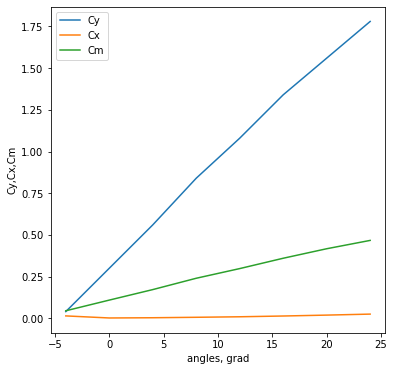

In [13]:
# plot the data
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(data[:,0], data[:,1],color='tab:blue',label="Cy")#, 
ax.plot(data[:,0], data[:,2], color='tab:orange',label="Cx")
ax.plot(data[:,0], data[:,3], color='tab:green',label="Cm")
ax.set_xlabel("angles, grad")
ax.set_ylabel("Cy,Cx,Cm")
ax.legend()
plt.show()

Построим поляру для выбранного профиля

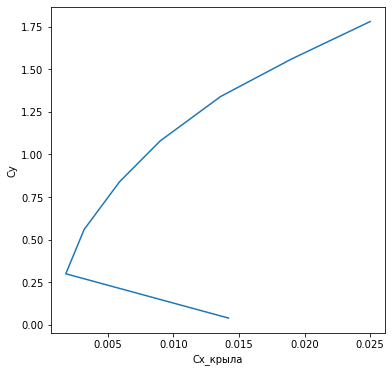

In [14]:
#plot data
fig1, ax = plt.subplots(figsize=(6, 6))
ax.plot(data[:,2], data[:,1],color='tab:blue')
ax.set_xlabel("Cx_крыла")
ax.set_ylabel("Cy")
#ax.legend()
plt.show()

На текущий момент у нас определен только коэффициент сопротивления крыла $C_{x_{кр}}$. Полный коэффициент сопротивления будет равен:
$$C_{x}= C_{x_{кр}} + 1,15*C_{x_{вр}} $$

Вредное сопротивление $C_{x_{вр}}$ поределим как $$C_{x_{вр}} = C_{x_{ф}} + C_{x_{стаб}} $$



In [15]:
#Расчет C_x_вр для каждого типоразмера крыла
C_x_fz = 0.12 #бр, кфт сопротивления каплевидной формы (Таблица 1)
a_fz = 0.05 # м, половина высоты фюзеляжа
b_fz = 0.07 # м, половина ширины фюзеляжа
C_x_stab = 0.15

C_x_motorbox = 0.12
r_motorbox = 0.007 # м, радиус корпуса под двигатель

C_x_bad = (S_wing/(C_x_fz*math.pi*a_fz + C_x_motorbox*r_motorbox**2))**-1
pd.DataFrame(C_x_bad,index=["p30","p40","p50","p60"],columns=["C_x_bad"])


,C_x_bad
p30,0.041956
p40,0.055942
p50,0.069927
p60,0.083913


Рассчитаем полное сопротивление модели

In [16]:
#C_x_full calculation
C_x_full = np.zeros([8,4])
for i in range (4):
    for j in range (8):
        C_x_full[j,i] = data[j,2]+C_x_bad[i]*1.15
pd.DataFrame(C_x_full,index=data[:,0],columns=["p30","p40","p50","p60"])

,p30,p40,p50,p60
-4.0,0.06245,0.078533,0.094617,0.1107
0.0,0.05005,0.066133,0.082217,0.0983
4.0,0.05145,0.067533,0.083617,0.0997
8.0,0.05415,0.070233,0.086317,0.1024
12.0,0.05725,0.073333,0.089417,0.1055
16.0,0.06185,0.077933,0.094017,0.1101
20.0,0.06725,0.083333,0.099417,0.1155
24.0,0.07325,0.089333,0.105417,0.1215


Построим скорректированные поляры для каждого удельного давления на крыло

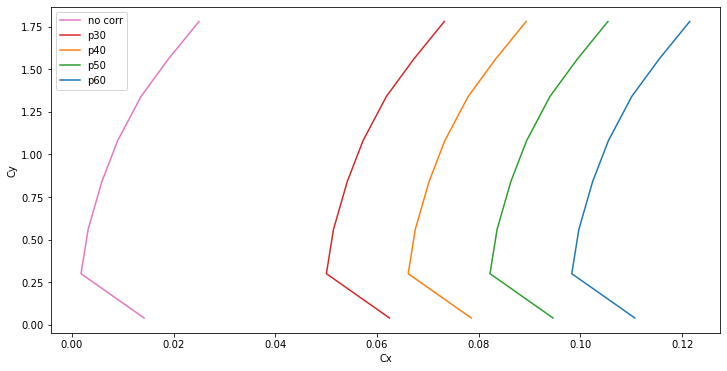

In [17]:
# Построение поляр
fig2, ax = plt.subplots(figsize=(12, 6))
ax.plot(data[:,2], data[:,1],color='tab:pink',label="no corr") 
ax.plot(C_x_full[:,0], data[:,1],color='tab:red',label="p30") 
ax.plot(C_x_full[:,1], data[:,1],color='tab:orange',label="p40")
ax.plot(C_x_full[:,2], data[:,1],color='tab:green',label="p50")
ax.plot(C_x_full[:,3], data[:,1],color='tab:blue',label="p60")
ax.set_xlabel("Cx")
ax.set_ylabel("Cy")
ax.legend()
plt.show()

Построим график аэродинамического качества модели

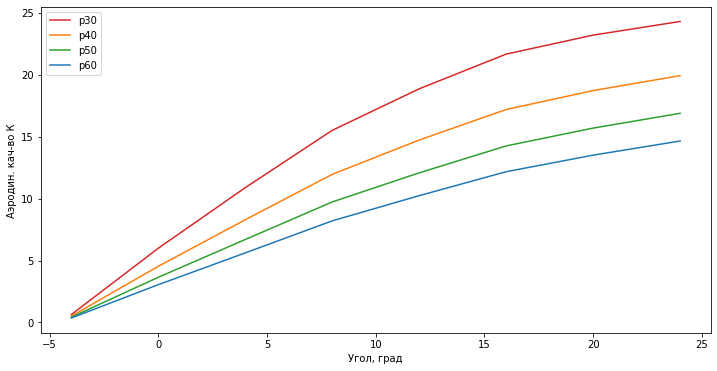

In [18]:
# Построение графиков аэродинамического качества для разных удельных давлений
C_y_full = data[:,1]
K = np.zeros([8,4])
for i in range (4):
    for j in range (8):
        K[j,i] = C_y_full[j]/C_x_full[j,i]
#K_0 = C_y_full/C_x_full[:,0]
#K_1 = C_y_full/C_x_full[:,1]
#K_2 = C_y_full/C_x_full[:,2]
#K_3 = C_y_full/C_x_full[:,3]
fig3, ax = plt.subplots(figsize=(12, 6))
ax.plot(data[:,0], K[:,0] ,color='tab:red',label = 'p30')
ax.plot(data[:,0], K[:,1] ,color='tab:orange',label = 'p40')
ax.plot(data[:,0], K[:,2] ,color='tab:green',label = 'p50')
ax.plot(data[:,0], K[:,3] ,color='tab:blue',label = 'p60')
ax.set_xlabel("Угол, град")
ax.set_ylabel("Аэродин. кач-во К")
ax.legend()
plt.show()


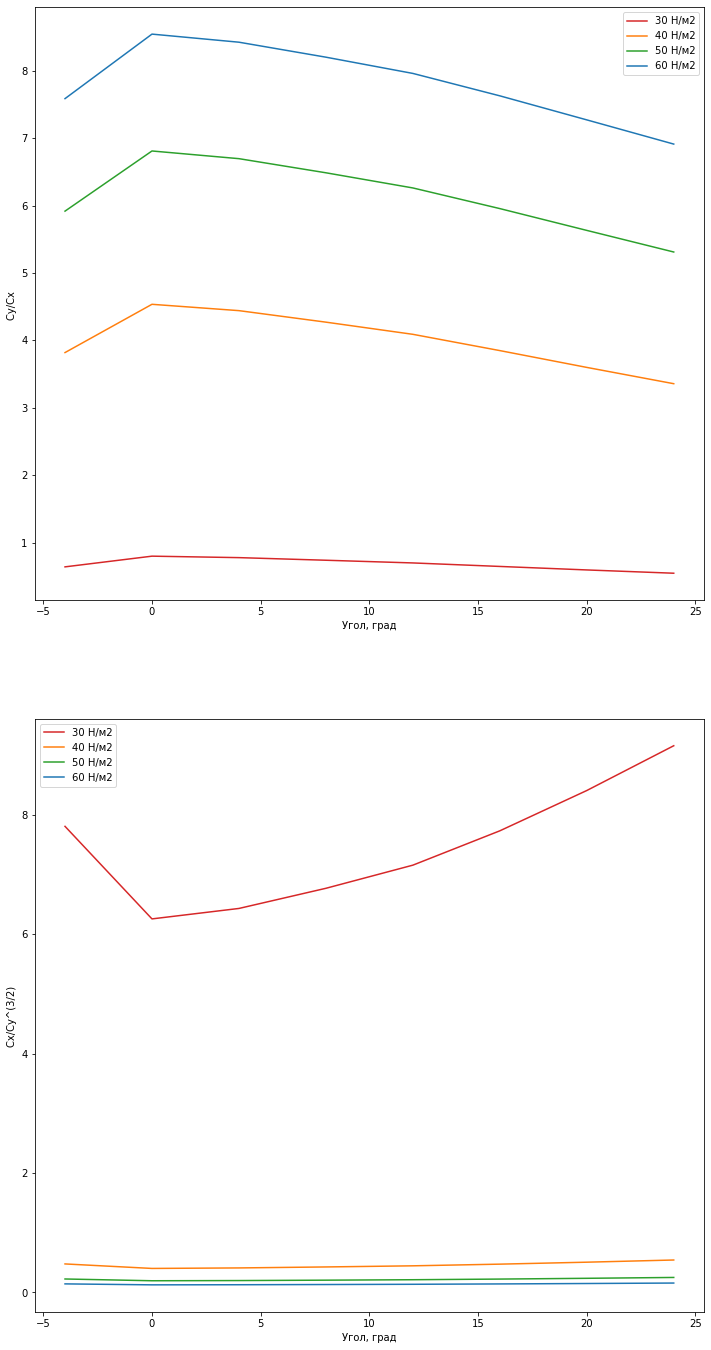

In [19]:
# Построение зависимостей Cy/Cx от угла и Cx/Cy^3/2 от угла
param1 = np.zeros([8,4])
param2 = np.zeros([8,4])


for i in range (4):
    for j in range (8):
        param1[j,i] = C_y_full[i]/C_x_full[j,i]
        param2[j,i] = C_x_full[j,i]/(C_y_full[i]**(3/2))

fig4, ax = plt.subplots(2,1,figsize=(12, 24))
ax[0].plot(data[:,0], param1[:,0] ,color='tab:red',label="30 Н/м2")
ax[0].plot(data[:,0], param1[:,1] ,color='tab:orange',label="40 Н/м2")
ax[0].plot(data[:,0], param1[:,2] ,color='tab:green',label="50 Н/м2")
ax[0].plot(data[:,0], param1[:,3] ,color='tab:blue',label="60 Н/м2")

ax[0].set_xlabel("Угол, град")
ax[0].set_ylabel("Cy/Cx ")
ax[0].legend()
ax[1].plot(data[:,0], param2[:,0] ,color='tab:red',label="30 Н/м2")
ax[1].plot(data[:,0], param2[:,1] ,color='tab:orange',label="40 Н/м2")
ax[1].plot(data[:,0], param2[:,2] ,color='tab:green',label="50 Н/м2")
ax[1].plot(data[:,0], param2[:,3] ,color='tab:blue',label="60 Н/м2")
ax[1].set_xlabel("Угол, град")
ax[1].set_ylabel("Cx/Cy^(3/2) ")
ax[1].legend()
plt.show()


Расчет скорости горизонтального полета

In [20]:
# Расчет скоростей полета для каждого удельного давления
V_plane = np.zeros([8,4])
for i in range (4):
    for j in range (8):
        V_plane[j,i] = 1.278*math.sqrt(p_wing[i]/C_y_full[j])
V_plane[V_plane > 40] = 40
pd.DataFrame(V_plane,index=data[:,0],columns=["p30","p40","p50","p60"])

,p30,p40,p50,p60
-4.0,34.665382,40.000000,40.000000,40.000000
0.0,12.658008,14.616208,16.341418,17.901126
4.0,9.264713,10.697969,11.960693,13.102283
8.0,7.564607,8.734855,9.765865,10.697969
12.0,6.671356,7.703418,8.612683,9.434722
16.0,5.989266,6.915808,7.732109,8.470101
20.0,5.550904,6.409631,7.166186,7.850163
24.0,5.196560,6.000471,6.708731,7.349046


In [21]:
# Расчет скоростей снижения для каждого удельного давления
Vy = np.zeros([8,4])
Vy = V_plane/K
pd.DataFrame(Vy,index=data[:,0],columns=["p30","p40","p50","p60"])

,p30,p40,p50,p60
-4.0,54.121302,78.533294,94.616618,110.699942
0.0,2.111776,3.222060,4.478454,5.865599
4.0,0.851195,1.290123,1.785916,2.332673
8.0,0.487647,0.730331,1.003520,1.304133
12.0,0.353643,0.523071,0.713071,0.921632
16.0,0.276445,0.402218,0.542498,0.695939
20.0,0.239294,0.342395,0.456691,0.581214
24.0,0.213847,0.301147,0.397310,0.501634


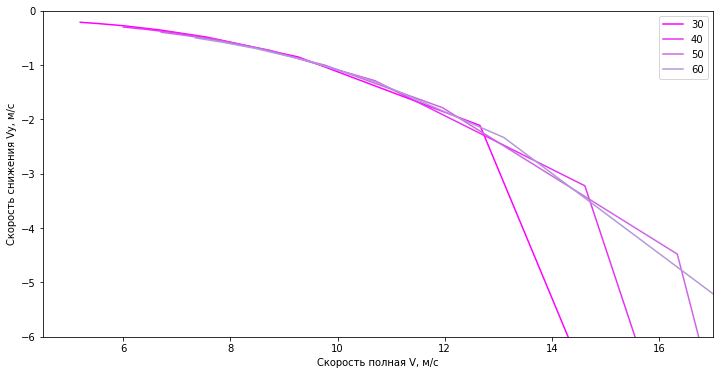

In [22]:
# Построение графиков зависимости скорости снижения от общей скорости
fig3, ax = plt.subplots(figsize=(12, 6))
plt.axis([4.5, 17, -6, 0])
for i in range (4):
    ax.plot(V_plane[:,i], -Vy[:,i] ,color=(1-0.1*i, 0.2*i, 1-0.05*i),label=(10*i+30))
ax.set_xlabel("Скорость полная V, м/с")
ax.set_ylabel("Скорость снижения Vy, м/с")
ax.legend()
plt.show()

In [23]:
#V = np.linspace(1, 20, 20)
Cy = np.linspace(0.,1.6,9) 
lmb = np.array([5, 8, 10, 12, 15, 18, 20])

Cy_lmb = np.array([[0,0,0,0,0,0,0], 
                  [0.0025,0.0015,0.0012,0.0010,0.0008,0.0007,0.0006],
                  [0.0102,0.0063,0.0051,0.0042,0.0034,0.0028,0.0026],
                  [0.0229,0.0140,0.0110,0.0095,0.0076,0.0064,0.0057],
                  [0.0408,0.0250,0.0200,0.0170,0.0136,0.0113,0.0102],
                  [0.0637,0.0390,0.0310,0.0260,0.0212,0.0177,0.0159],
                  [0.0917,0.0570,0.0460,0.0380,0.0306,0.0255,0.0229],
                  [0.1248,0.0770,0.0620,0.0520,0.0416,0.0347,0.0312],
                  [0.1631,0.1010,0.0850,0.0680,0.0544,0.0453,0.0408]])

#df = pd.DataFrame({ lmb[0]: [Cy_lmb[:,0]] 
Cy_lmb

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.0025, 0.0015, 0.0012, 0.001 , 0.0008, 0.0007, 0.0006],
       [0.0102, 0.0063, 0.0051, 0.0042, 0.0034, 0.0028, 0.0026],
       [0.0229, 0.014 , 0.011 , 0.0095, 0.0076, 0.0064, 0.0057],
       [0.0408, 0.025 , 0.02  , 0.017 , 0.0136, 0.0113, 0.0102],
       [0.0637, 0.039 , 0.031 , 0.026 , 0.0212, 0.0177, 0.0159],
       [0.0917, 0.057 , 0.046 , 0.038 , 0.0306, 0.0255, 0.0229],
       [0.1248, 0.077 , 0.062 , 0.052 , 0.0416, 0.0347, 0.0312],
       [0.1631, 0.101 , 0.085 , 0.068 , 0.0544, 0.0453, 0.0408]])

# Подготовка данных к переносу в Autodesk Fusion

In [24]:
# Импорт координат профиля крыла из атласа профилей
df_profile = pd.read_csv('../Script/Profile_calc4/Р-III (15,5%)-Исходные данные профиля.csv',delimiter=',')
profile = df_profile.to_numpy()
#profile

In [25]:
# Формирование цепочки точек сплайна из полученной таблицы
index_up = np.array(range(18+19,18,-1))
df_profile_up = pd.DataFrame(np.array([profile[:,0],profile[:,1]]),columns=index_up)
index_down = np.array(range(0,19,1))
df_profile_down = pd.DataFrame(np.array([profile[:,0],profile[:,2]]),columns=index_down)
df_profile_build = pd.concat([df_profile_down.T,df_profile_up.T])
df_profile_build = df_profile_build.sort_index()
profile_build = df_profile_build.to_numpy()
profile_build


array([[ 0.    ,  0.    ],
       [ 0.005 , -0.0106],
       [ 0.01  , -0.0145],
       [ 0.02  , -0.0195],
       [ 0.03  , -0.0223],
       [ 0.05  , -0.0263],
       [ 0.07  , -0.029 ],
       [ 0.1   , -0.0312],
       [ 0.15  , -0.0325],
       [ 0.2   , -0.0331],
       [ 0.25  , -0.0332],
       [ 0.3   , -0.0326],
       [ 0.4   , -0.0308],
       [ 0.5   , -0.0274],
       [ 0.6   , -0.023 ],
       [ 0.7   , -0.018 ],
       [ 0.8   , -0.0122],
       [ 0.9   ,  0.    ],
       [ 1.    ,  0.    ],
       [ 1.    ,  0.    ],
       [ 0.9   ,  0.019 ],
       [ 0.8   ,  0.038 ],
       [ 0.7   ,  0.057 ],
       [ 0.6   ,  0.076 ],
       [ 0.5   ,  0.094 ],
       [ 0.4   ,  0.109 ],
       [ 0.3   ,  0.1192],
       [ 0.25  ,  0.1218],
       [ 0.2   ,  0.1218],
       [ 0.15  ,  0.117 ],
       [ 0.1   ,  0.104 ],
       [ 0.07  ,  0.0905],
       [ 0.05  ,  0.0775],
       [ 0.03  ,  0.06  ],
       [ 0.02  ,  0.0484],
       [ 0.01  ,  0.033 ],
       [ 0.005 ,  0.023 ],
 

In [111]:
# Коэффициент масштаба для экспора во Fusion 
Scale = 0.1 # Почему-то fusion этот коэффициент воспринимает как миллиметры
Select_type = 2 # выбранные данные из рассчитанного набора
"""
0-Р30
1-Р40
2-Р50
3-Р60
"""

'\n0-Р30\n1-Р40\n2-Р50\n3-Р60\n'

In [119]:
# Функция по сбору CSV файла из входных данных
def CSV_profile_creation(b,move_X,move_Y,move_Z,csv_dataname):
    # Двигаем профиль в сторону (в данном расчете Z-перемещение вправо)
    profile_Z = np.ones(38)*move_Z # мм
    # Увеличиваем импортированный профиль пропорционально рассчитанным значениям
    # (стоит учесть, что профиль строится от условного 0 до условной 1)
    profile_b = profile_build * b # мм
    # Смещение профиля по осям X
    profile_XY = profile_b[:,:] + [move_X,move_Y]
    # Присоединение колонки оси Z r jcnfkmysv lfyysv
    profile_XYZ = np.insert(profile_XY,2,profile_Z,axis=1)
    # Перепаковка Numpy в Pandas для экспорта в csv
    df_profile_XYZ = pd.DataFrame(profile_XYZ)*Scale
    # Формирование имени файла
    out_name = csv_dataname + '.csv'
    # Экспорт CSV файла
    df_profile_XYZ.to_csv(out_name,index=False,header=False)
    
    return('Export CSV file "' + out_name + '" is done')

In [132]:
CSV_profile_creation(150,0,0,0,'wing_base')
CSV_profile_creation(150,0,0,-l_wing[Select_type]/2,'wing_left')
CSV_profile_creation(150,0,0,l_wing[Select_type]/2,'wing_right')
CSV_profile_creation(150,0,0,0,'stab_base')
CSV_profile_creation(150,0,0,-l_stab[Select_type]/2,'stab_left')
CSV_profile_creation(150,0,0,l_stab[Select_type]/2,'stab_right')


'Export CSV file "test1.csv" is done'

In [133]:
profile_wing_l_Z = np.ones(38)*l_wing[2]/2 
profile_wing_r_Z = - profile_wing_l_Z
profile_wing_b_Z = np.zeros(38)
profile_stab_l_Z = np.ones(38)*l_stab[2]/2 
profile_stab_r_Z = - profile_stab_l_Z
profile_stab_b_Z = np.zeros(38)



In [134]:
profile_wing_b = profile_build * b_wing_base[2]

profile_wing_b = np.insert(profile_wing_b,2,profile_wing_b_Z,axis=1)
profile_wing_b[:,0] = profile_wing_b[:,0]-X_t[2]
df_profile_wing_b = pd.DataFrame(profile_wing_b)*Scale
df_profile_wing_b.to_csv('Profile_wing_base.csv',index=False,header=False)

In [135]:
profile_wing_l_Z

array([0.97146762, 0.97146762, 0.97146762, 0.97146762, 0.97146762,
       0.97146762, 0.97146762, 0.97146762, 0.97146762, 0.97146762,
       0.97146762, 0.97146762, 0.97146762, 0.97146762, 0.97146762,
       0.97146762, 0.97146762, 0.97146762, 0.97146762, 0.97146762,
       0.97146762, 0.97146762, 0.97146762, 0.97146762, 0.97146762,
       0.97146762, 0.97146762, 0.97146762, 0.97146762, 0.97146762,
       0.97146762, 0.97146762, 0.97146762, 0.97146762, 0.97146762,
       0.97146762, 0.97146762, 0.97146762])

In [136]:
profile_wing_l = profile_build * b_wing_end[2]
profile_wing_l = np.insert(profile_wing_l,2,profile_wing_l_Z,axis=1)
profile_wing_l[:,0] = profile_wing_l[:,0]-X_t[2]
profile_wing_l[:,1] = profile_wing_l[:,1]+0.05
profile_wing_l

array([[-4.66304457e-02,  5.00000000e-02,  9.71467618e-01],
       [-4.60356696e-02,  4.87390747e-02,  9.71467618e-01],
       [-4.54408935e-02,  4.82751493e-02,  9.71467618e-01],
       [-4.42513413e-02,  4.76803732e-02,  9.71467618e-01],
       [-4.30617891e-02,  4.73472986e-02,  9.71467618e-01],
       [-4.06826847e-02,  4.68714778e-02,  9.71467618e-01],
       [-3.83035804e-02,  4.65502987e-02,  9.71467618e-01],
       [-3.47349238e-02,  4.62885972e-02,  9.71467618e-01],
       [-2.87871629e-02,  4.61339554e-02,  9.71467618e-01],
       [-2.28394020e-02,  4.60625823e-02,  9.71467618e-01],
       [-1.68916410e-02,  4.60506867e-02,  9.71467618e-01],
       [-1.09438801e-02,  4.61220599e-02,  9.71467618e-01],
       [ 9.51641749e-04,  4.63361793e-02,  9.71467618e-01],
       [ 1.28471636e-02,  4.67406270e-02,  9.71467618e-01],
       [ 2.47426855e-02,  4.72640300e-02,  9.71467618e-01],
       [ 3.66382073e-02,  4.78588061e-02,  9.71467618e-01],
       [ 4.85337292e-02,  4.85487463e-02

In [137]:
df_profile_wing_l = pd.DataFrame(profile_wing_l, columns=["X","Y","Z"])*Scale
df_profile_wing_l
df_profile_wing_l.to_csv('Profile_wing_end.csv',index=False,header=False)